In [1]:
import numpy as np
import matplotlib.pyplot as plt


1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [4]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

**Делаем функцию calc_logloss невосприимчивой к нулям под знаком логарифма**

---



In [5]:
def calc_logloss(y, y_pred):

  # На время отладки конвертируем y_pred во флоат принудительно

  y_pred = y_pred.astype(float)
  
  a = np.where(y_pred == 0.0) # Ищем индексы элементов со значением ноль
  b = np.where(y_pred == 1.0) # Ищем индексы элементов со значением 1

  y_pred[a] += np.finfo(np.float).eps # Прибавляем к нулям машинную эпсилон
  y_pred[b] -= np.finfo(np.float).eps # Отнимаем от единиц машинную эпсилон

  # Теперь под знаком логарифма гарантированно отсутствует ноль.

  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  return err

In [6]:
# Поменяем местоми y1 и y1_pred, чтобы в функцию попали нули и единицы
y1 = np.array([1, 0, 0, 1])
y_pred1 = np.array([0.9, 0.1, 0.1, 0.9])
calc_logloss(y_pred1, y1)

# До изменения ответом была + бесконечность

3.604365338911715

In [7]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

# Работа в штатном режиме (без нулей) не пострадала

0.10536051565782628

In [8]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [9]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [10]:
### Logistic Regression

def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W
  

In [11]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-4)

100 [ 0.49282748 -0.15007528  0.64748973  1.51727915] 1.2014814214705334
200 [ 0.48896219 -0.16184918  0.64728128  1.51155738] 1.1828456288538924
300 [ 0.48511874 -0.17358386  0.64706349  1.50586552] 1.1643525542846553
400 [ 0.4812976  -0.18527698  0.64683669  1.50020462] 1.1460086359433084
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
600 [ 0.47372426 -0.20852799  0.6463577   1.48898028] 1.109796908143704
700 [ 0.46997312 -0.22007992  0.6461065   1.48341934] 1.0919450148769096
800 [ 0.46624642 -0.23157833  0.64584825  1.47789438] 1.074274212586137
900 [ 0.46254476 -0.24301946  0.64558365  1.4724069 ] 1.0567942835649755
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489


**Подбор параметров логистической регрессии**

---



In [12]:
### Logistic Regression

eps = 1e-5
max_iteration = int(1e+6)
alpha_stack = np.array([1000 / x for x in range(1, 10001)])



def eval_model_epic_test(X, y):
  Ws = []
  losses = []
  iterations = []
  
  for alpha in alpha_stack:
    last_err = np.inf
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]

    for i in range(1, max_iteration+1):
      z = np.dot(W, X)
      y_pred = sigmoid(z)
      err = calc_logloss(y, y_pred)
      W -= alpha * (1/n * np.dot((y_pred - y), X.T))

      # if i % (100) == 0:
      #   print(i, W, err, alpha)

      if np.abs(err - last_err) < eps:
        break
      
      last_err = err

      
    # print(f"Подбор завершился при альфа {alpha} на итерации {i}, значение функции потерь {err}.")
    # print(W)

   
    Ws.append(W)
    losses.append(err)
    iterations.append(i)
  print(f"Алгоритм успешно завершён. Обработано {len(losses)} значений.")
  return Ws, losses, iterations
  

In [13]:
Ws, losses, iterations = eval_model_epic_test(X_st, y)

Алгоритм успешно завершён. Обработано 10000 значений.


**Реализация функций, возвращающих предсказание в виде вероятности и в виде класса**

---



In [14]:
def calc_pred_proba(W, X):
  return sigmoid(W@X).flatten()

def calc_pred(W, X, thres=0.8):
  return ((calc_pred_proba(W,X) - thres) >= 0).astype(float)

In [15]:
losses = np.array(losses)
iterations = np.array(iterations)
calc_pred(Ws[99], X_st)

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [16]:
min_loss = losses.min()
min_alpha_l = alpha_stack[np.where(losses == min_loss)]


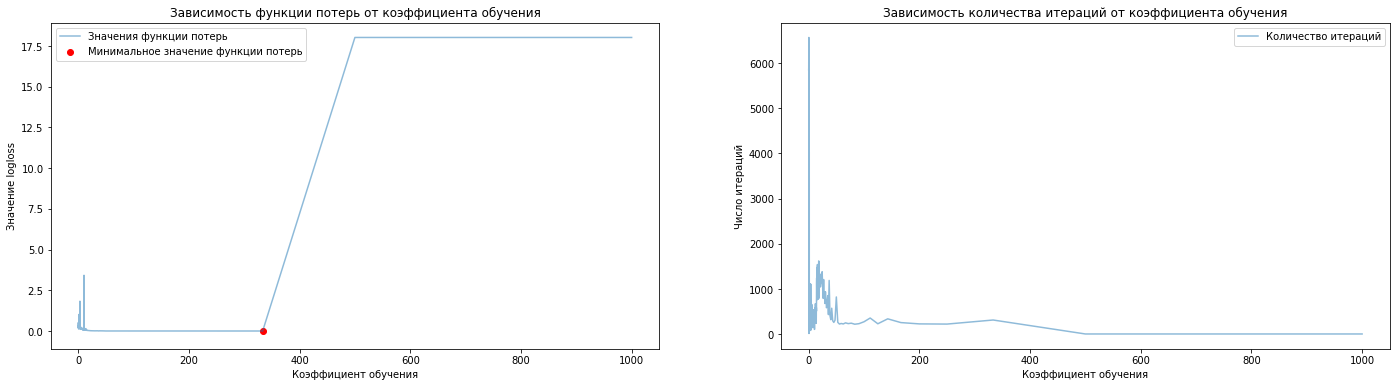

In [17]:
fig, ax = plt.subplots(1,2, figsize=(24,6))

ax[0].set_title("Зависимость функции потерь от коэффициента обучения")
ax[0].plot(alpha_stack, losses, alpha=0.5, label="Значения функции потерь")
ax[0].scatter(min_alpha_l ,min_loss, 
              color='red',
              marker='o', 
              label="Минимальное значение функции потерь")
ax[0].set_xlabel("Коэффициент обучения")
ax[0].set_ylabel("Значение logloss")
ax[0].legend()
ax[1].set_title("Зависимость количества итераций от коэффициента обучения")
ax[1].plot(alpha_stack, iterations, alpha=0.5, label="Количество итераций")

ax[1].set_xlabel("Коэффициент обучения")
ax[1].set_ylabel("Число итераций")
ax[1].legend()


In [18]:
Ws[55]

array([-123.98897193,  -13.64330215,  -34.3964024 ,  102.20897474])

In [19]:
calc_pred(Ws[55], X_st)

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [20]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

По итогу аналази работы функций и возвращаемых значений можно сделать вывод, что на предлагаемом наборе данных метод склонен к переобучению. Не смотря на минимальные значения функции потерь, значения коэффициентов при этом очень большие и ожидается, что на тестовых данных модель выдаст плохой результат.
Таким образом, можно говорить о переобучении модели.

**Метрики**


---



In [21]:
def metrics(y, y_pred):

# дополнительные переменные создаются для наглядности. 
# в другой ситуции обошлись бы только матрицей

  tp = 0
  tn = 0
  fp = 0
  fn = 0
  # conf = np.zeros((2,2))  # (0,0) - TP, (0, 1) - FP, (1, 0) - TN, (1, 1) - FN

  for i in range(len(y)):
    if y[i] == 1 and y[i] == y_pred[i]:
      tp += 1
    if y[i] == 1 and y[i] != y_pred[i]:
      fn += 1
    if y[i] == 0 and y[i] == y_pred[i]:
      tn += 1
    if y[i] == 0 and y[i] != y_pred[i]:
      fp += 1

  conf = np.array([[tp, fp], [fp, tn]]) #  confusion matrix 

  # "Аккуратность" - доля правильных ответов
  accuracy = (tp + tn) / (tp + fp + tn + fn)
  # Точность - доля правильного выбора класса 1 к общему количеству
  # выборов класса 1
  precision = (tp) / (tp + fp)
  # Полнота - доля правильного выбора класса 1 к общему количеству
  # объектов этого класса
  recall = (tp) / (tp + fn)
  f1 = (precision * recall) / (precision + recall)

  metrics = {"accuracy":accuracy, "precision":precision, 
             "recall":recall, "f1_score":f1}

  return conf, metrics


In [22]:
conf, metrics = metrics(y, calc_pred(Ws[55], X_st))
print(conf)
print(metrics)

[[5 0]
 [0 5]]
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 0.5}


**Логистическая регрессия с регуляризацией**


---



In [23]:
### Logistic Regression

eps = 1e-5
max_iteration = int(1e+6)
alpha_stack = np.array([100 / x for x in range(1, 10001)])



def eval_model_epic_test_with_LX(X, y, regularisation=1, lambda_=1e-4):
  Ws = []
  losses = []
  iterations = []
  
  for alpha in alpha_stack:
    last_err = np.inf
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]

    for i in range(1, max_iteration+1):
      z = np.dot(W, X)
      y_pred = sigmoid(z)
      err = calc_logloss(y, y_pred)
      if regularisation == 0:
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
      elif regularisation == 1:
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) + lambda_ * np.sign(W)/2
      else:
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) +  lambda_ * W

      # if i % (100) == 0:
      #   print(i, W, err, alpha)

      if np.abs(err - last_err) < eps:
        break
      
      last_err = err
      
    # print(f"Подбор завершился при альфа {alpha} на итерации {i}, значение функции потерь {err}.")
    # print(W)

   
    Ws.append(W)
    losses.append(err)
    iterations.append(i)
  print(f"Алгоритм успешно завершён. Обработано {len(losses)} значений.")
  return Ws, losses, iterations

In [24]:
Ws, losses, iterations = eval_model_epic_test_with_LX(X_st, y)

Алгоритм успешно завершён. Обработано 10000 значений.


In [25]:
losses = np.array(losses)
iterations = np.array(iterations)
calc_pred(Ws[99], X_st)

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [28]:
min_loss = losses.min()
min_alpha_l = alpha_stack[np.where(losses == min_loss)]

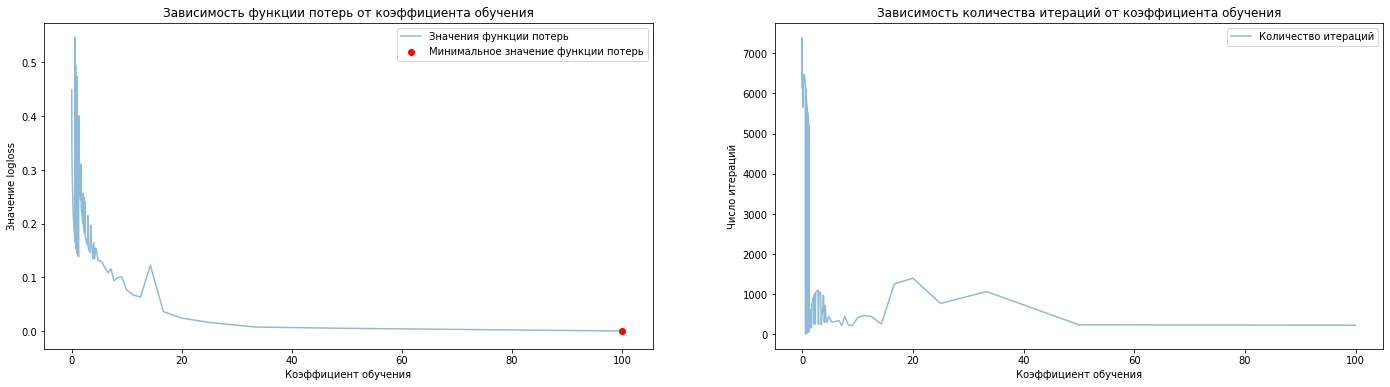

In [29]:
fig, ax = plt.subplots(1,2, figsize=(24,6))

ax[0].set_title("Зависимость функции потерь от коэффициента обучения")
ax[0].plot(alpha_stack, losses, alpha=0.5, label="Значения функции потерь")
ax[0].scatter(min_alpha_l ,min_loss, 
              color='red',
              marker='o', 
              label="Минимальное значение функции потерь")
ax[0].set_xlabel("Коэффициент обучения")
ax[0].set_ylabel("Значение logloss")
ax[0].legend()
ax[1].set_title("Зависимость количества итераций от коэффициента обучения")
ax[1].plot(alpha_stack, iterations, alpha=0.5, label="Количество итераций")

ax[1].set_xlabel("Коэффициент обучения")
ax[1].set_ylabel("Число итераций")
ax[1].legend()

In [ ]:
conf, metrics = metrics(y, calc_pred(Ws[55], X_st))
print(conf)
print(metrics)